https://github.com/muthuspark/ml_research

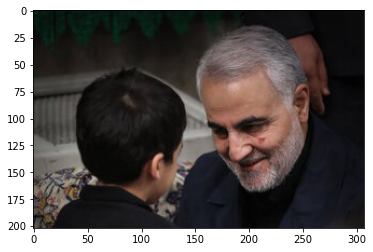

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# file_name = "salavat.jpg"
file_name = 'Qasem.jpg'
# file_name = "Soleimani_Last_Image.jpg"
img = imread(file_name)
plt.imshow(img)

Convert the image to grayscale because threshold otsu works only on 2 dimentional image

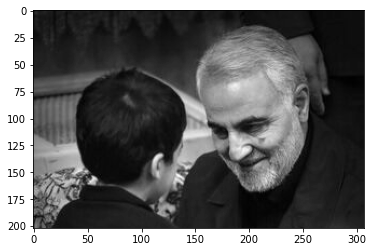

In [28]:
# convert the image to grayscale
gray_img = rgb2gray(img)
plt.imshow(gray_img, cmap="gray")

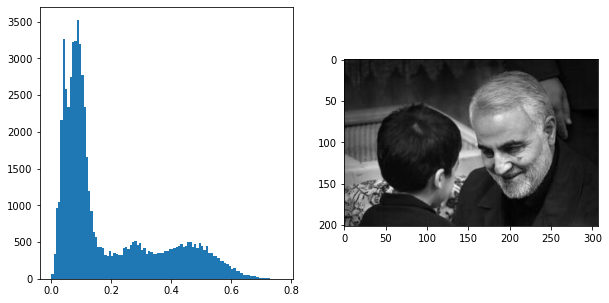

In [29]:
# generate image histogram
hist = np.histogram(gray_img.flatten())
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].hist(gray_img.flatten(), bins=100)
ax[1].imshow(gray_img, cmap="gray")

The historam generated above gives use the spread of the colors in the image with the x-axis representing the spread of colors. In Otsu method, we will iteratively divide the backgorund and foreground pixels at a selected threshold between the minimum color and maximum color in the image. At each iteration we will identify the within class variation. The threshold where the within class variation is the least is our threshold.

In [32]:
def threshold_otsu_impl(image, nbins=0.1):
    
    #validate grayscale
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("must be a grayscale image.")
        return
    
    #validate multicolored
    if np.min(image) == np.max(image):
        print("the image must have multiple colors")
        return
    
    all_colors = image.flatten()
    total_weight = len(all_colors)
    least_variance = -1
    least_variance_threshold = -1
    
    # create an array of all possible threshold values which we want to loop through
    color_thresholds = np.arange(np.min(image)+nbins, np.max(image)-nbins, nbins)
    
    # loop through the thresholds to find the one with the least within class variance
    for color_threshold in color_thresholds:
        bg_pixels = all_colors[all_colors < color_threshold]
        weight_bg = len(bg_pixels) / total_weight
        variance_bg = np.var(bg_pixels)

        fg_pixels = all_colors[all_colors >= color_threshold]
        weight_fg = len(fg_pixels) / total_weight
        variance_fg = np.var(fg_pixels)

        within_class_variance = weight_fg*variance_fg + weight_bg*variance_bg
        if least_variance == -1 or least_variance > within_class_variance:
            least_variance = within_class_variance
            least_variance_threshold = color_threshold
        print("trace:", within_class_variance, color_threshold)
            
    return least_variance_threshold

trace: 0.014519481666969347 0.1
trace: 0.005683022083081066 0.2
trace: 0.005343396658911629 0.30000000000000004
trace: 0.008416633323749142 0.4
trace: 0.01687092932027182 0.5
trace: 0.025516685757132507 0.6
0.30000000000000004 0.2597120098039215


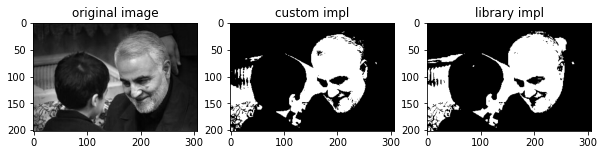

In [33]:
from skimage.filters import threshold_otsu

# thresholding the image using our custom implementation
threshold_c = threshold_otsu_impl(gray_img)
bin_img_from_custom = gray_img > threshold_c

# thresholding the image using the skimage library implementation
threshold_s = threshold_otsu(gray_img)
bin_img_from_lib = gray_img > threshold_s
print(threshold_c, threshold_s)

fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].set_title("original image")
ax[0].imshow(gray_img, cmap="gray")

ax[1].set_title("custom impl")
ax[1].imshow(bin_img_from_custom, cmap="gray")

ax[2].set_title("library impl")
ax[2].imshow(bin_img_from_lib, cmap="gray")